**1: Install required libraries**

Installs essential Python libraries required for data handling, machine learning, and visualization. These include scikit-learn, pandas, matplotlib, and seaborn.

In [ ]:
!pip install -q scikit-learn pandas seaborn matplotlib

**2: Import libraries**

Imports necessary Python modules used throughout the project, including tools for data manipulation, model training, evaluation metrics, and plotting.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**3: Load dataset**

Loads the sentiment dataset from CSV, selects only the relevant columns (Text and Sentiment), and removes any rows with missing values.

In [ ]:
df = pd.read_csv('/content/sm_sentiment.csv')[['Text', 'Sentiment']].dropna()
df.head()

,Text,Sentiment
0,"Painful echoes of a love once cherished, now l...",LostLove
1,Finding acceptance in the midst of life's chal...,Acceptance
2,"At the front row of Adele's concert, each note...",Emotion
3,"Immersed in the soulful melodies of Adele, tea...",Emotion
4,Arousal of excitement for an upcoming adventure.,Arousal


**4: Encode sentiment labels**

Encodes the text sentiment labels into numeric format using LabelEncoder, which is necessary for machine learning models. Also prints out the number and examples of encoded sentiment classes.

In [ ]:
# Convert string labels to numeric class IDs
le = LabelEncoder()
df['label'] = le.fit_transform(df['Sentiment'])

# View some of the encoded labels
print("Number of classes:", len(le.classes_))
print("Example labels:", list(le.classes_)[:10])

Number of classes: 191
Example labels: ['Acceptance', 'Accomplishment', 'Admiration', 'Adoration', 'Adrenaline', 'Adventure', 'Affection', 'Amazement', 'Ambivalence', 'Amusement']


**5: Filtering Rare Sentiment Classes**

Counts the number of samples per class, identifies classes with only one sample, and filters them out to prevent issues during training. This improves the model's reliability and balance.

In [ ]:
# Count the occurrences of each class
class_counts = df['label'].value_counts()

# Identify classes with only one sample
single_instance_classes = class_counts[class_counts == 1].index

# Filter out rows where the label is in the single_instance_classes
df_filtered = df[~df['label'].isin(single_instance_classes)].copy()

# Re-apply LabelEncoder to the filtered data to get contiguous labels
le_filtered = LabelEncoder()
df_filtered['label'] = le_filtered.fit_transform(df_filtered['Sentiment'])

# Split the data into training and testing sets using the filtered dataframe
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered['Text'], df_filtered['label'], test_size=0.2, stratify=df_filtered['label'], random_state=42
)

print("Original number of classes:", len(le.classes_))
print("Number of classes after filtering:", len(le_filtered.classes_))
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Original number of classes: 191
Number of classes after filtering: 110
Shape of X_train: (503,)
Shape of X_test: (126,)


**6: TF-IDF Vectorization**


Transforms training and test text data into numerical vectors using the top 5,000 weighted terms for model input.

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**7: Model Training**

Trains a logistic regression classifier using the TF-IDF features from the training data. This model will be used to classify future text inputs into sentiment categories.

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

**8:  Model Evaluation**

Generates predictions on the test set using the trained model and prints a classification report showing precision, recall, and F1-scores for each sentiment class in the filtered dataset.

In [ ]:
y_pred = model.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_filtered.classes_, labels=y_test.unique()))


Classification Report:
                precision    recall  f1-score   support

    Acceptance       0.00      0.00      0.00         1
Accomplishment       0.00      0.00      0.00         4
    Admiration       0.00      0.00      0.00         1
     Adoration       0.00      0.00      0.00         1
     Adventure       0.00      0.00      0.00         1
     Affection       0.00      0.00      0.00         1
   Ambivalence       0.16      1.00      0.27         9
     Amusement       0.00      0.00      0.00         2
         Anger       1.00      0.75      0.86         4
  Anticipation       0.00      0.00      0.00         1
       Anxiety       1.00      0.67      0.80         3
  Apprehensive       0.20      0.89      0.32         9
       Arousal       0.00      0.00      0.00         1
           Awe       0.00      0.00      0.00         1
           Bad       0.33      0.62      0.43         8
      Betrayal       0.00      0.00      0.00         1
        Bitter       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 79, does not match size of target_names, 110
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

**9:  Confusion Matrix (Top Classes)**

Identifies the top 10 most common sentiment labels in the test set. Then filters predictions to include only these labels and displays a confusion matrix for better visual insight into the model’s performance across these high-frequency sentiments.

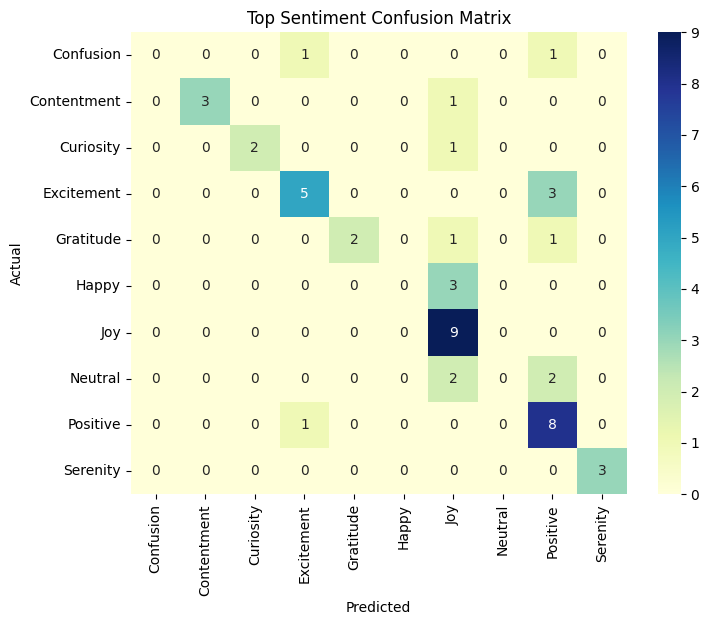

In [ ]:
from collections import Counter
import numpy as np

# Get most common classes
top_labels_and_counts = Counter(y_test).most_common(10)
top_labels = [label for label, count in top_labels_and_counts]

# Filter
filtered_y_test = [label for label in y_test if label in top_labels]
filtered_y_pred = [y_pred[i] for i in range(len(y_test)) if y_test.iloc[i] in top_labels]

# Confusion matrix for top labels
filtered_labels_names = le_filtered.inverse_transform(sorted(set(filtered_y_test)))
cm = confusion_matrix(filtered_y_test, filtered_y_pred, labels=sorted(set(filtered_y_test)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, xticklabels=filtered_labels_names, yticklabels=filtered_labels_names,
            annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Top Sentiment Confusion Matrix")
plt.show()

**10:  Class Distribution Visualization**

Plots a bar chart of the 20 most frequent sentiment classes in the entire dataset to visualize class distribution and identify any imbalance in label frequency.

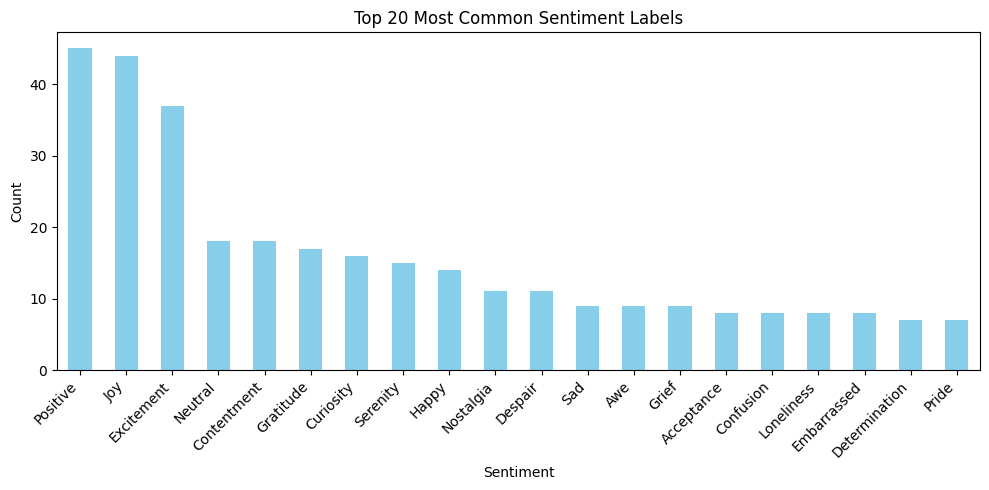

In [ ]:
import matplotlib.pyplot as plt

df['Sentiment'].value_counts().head(20).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Top 20 Most Common Sentiment Labels")
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**11:  F1-Score Analysis**

Calculates per-class precision, recall, F1-score, and support metrics for the test predictions. Then plots a bar chart of the top 15 sentiment classes ranked by F1-score to highlight which categories the model performs best on.

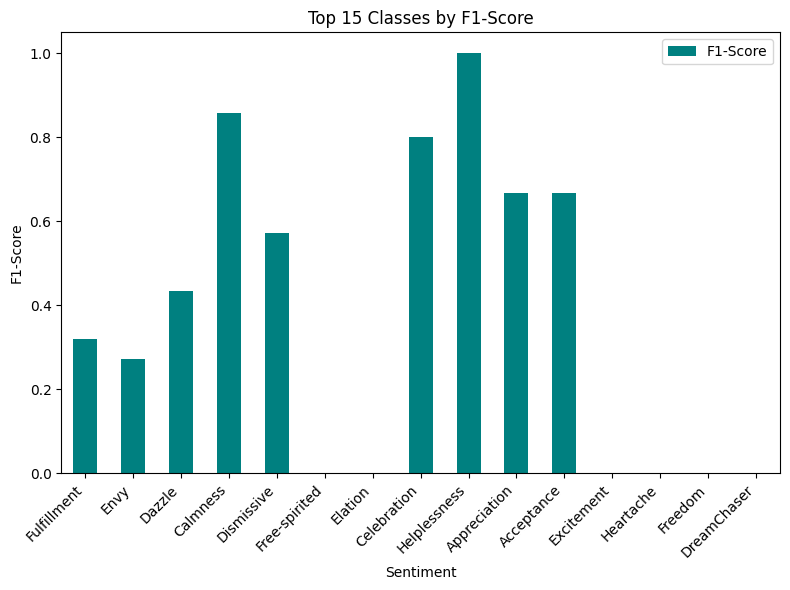

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, zero_division=0)

class_metrics = pd.DataFrame({
    'Sentiment': le.inverse_transform(sorted(set(y_test))),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
}).sort_values(by='Support', ascending=False)

# Plot F1-score for top 15
class_metrics.head(15).plot(x='Sentiment', y='F1-Score', kind='bar', figsize=(8, 6), color='teal')
plt.title("Top 15 Classes by F1-Score")
plt.ylabel("F1-Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**12:  Save Model & Encoders**

Saves the trained logistic regression model, TF-IDF vectorizer, and label encoder as .pkl files using joblib. These files can be reused later without retraining.

In [ ]:
import joblib

joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

**13:   Inference on New Text**

It predict the sentiment of a new, unseen text input. It transforms the input, predicts the label, and decodes it back to its original sentiment name.

In [ ]:
# Example: Predict a new text
new_text = ["This was absolutely magical and heartwarming."]
X_new = vectorizer.transform(new_text)
predicted_label = le.inverse_transform(model.predict(X_new))[0]

print("Predicted Sentiment:", predicted_label)

Predicted Sentiment: Fulfillment
